# Data Preprocessing

Hello, in this notebook we will try to download and pre-process astronomical data. The data contains 10,000 images of galaxies (either 3x64x64 or 3x224x224), confidently labelled by Galaxy Zoo volunteers as belonging to one of four morphology classes.

GalaxyMNIST has four classes: smooth and round, smooth and cigar-shaped, edge-on-disk, and unbarred spiral. The galaxies are selected from Galaxy Zoo DECaLS Campaign A (GZD-A). 

At least 17 people must have been asked the necessary questions, and at least half of them must have answered with the given class. The class labels are therefore much more confident than from, for example, simply labelling with the most common answer to some question.



### 1-Downloading the data.

First, let us call the python script that will let us download the data.

In [3]:
from data_import.galaxy_mnist import GalaxyMNISTHighrez

'GalaxyMNISTHighrez' class has the follwing attribuits: 
 - `root`: Specifing the dir to download the data
 - `download:` A boolean value, `True` to download the images
 - `train:` A boolean value, `True` to assign the just the training data, `False` will assgin just the testing data. 
   - `Notice:` The data has a fixed 80/20 train/test division.

In [4]:
# for the training data
dataset_train = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=True  # by default, or False for canonical test set
)
# for the testing data
dataset_test = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=False  # by default, or False for canonical test set
)

---

### 2- Reading and Visualising the data

first, let us read inputs `images` and outputs `labels` into two seperate variables

In [5]:
images_train = dataset_train.data
labels_train = dataset_train.targets

let us check the shape of the two datasets (traning, and testing)

In [6]:
print("Shape of the input (training) "+str(images_train.shape)+ ", type: "+ str(images_train.dtype))
print("Shape of the output (training) "+str(labels_train.shape)+ ", type: "+ str(labels_train.dtype))



Shape of the input (training) torch.Size([8000, 3, 224, 224]), type: torch.uint8
Shape of the output (training) torch.Size([8000]), type: torch.int64


we notice the following:
 1. The input data has 8000 samples with 3 channels, which stands for `rgb` colors, where each sample has a size of 224
 2. the output is just one dimnsional array, which contains the lables of the samples.

**Exersice1:**
Store the testing set inputs and outputs into two diffrint variables, and display thier shape.

In [7]:
### -- Code here --



Now let us check the labels frequency

In [8]:
import pandas as pd
from collections import Counter

df_labelsTrain = pd.DataFrame(labels_train)
dict_train =  df_labelsTrain.stack().value_counts().to_dict()
print(dict_train)

{3: 2020, 1: 1994, 0: 1993, 2: 1993}


Where the lables are defined as follows:


In [9]:
GalaxyMNISTHighrez.classes

['smooth_round', 'smooth_cigar', 'edge_on_disk', 'unbarred_spiral']

   - 0: `smooth_round`,
   - 1: `smooth_cigar`,
   - 2: `edge_on_disk`,
   - 3: `unbarred_spiral`

we can also try to visualse the above in a bar graph

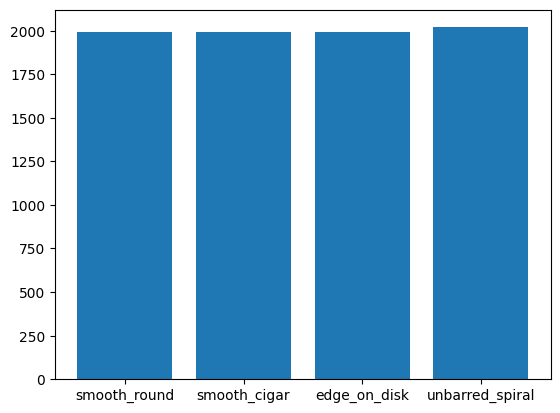

In [10]:
import matplotlib.pyplot as plt

# sorted_x = sorted(dict_train.keys(), key=operator.itemgetter(1)) # sorting dictionary according to thier keys
# sorted_dict_train  = sorted(wordsFreqDict.keys())


for newKey, oldKey in  zip( GalaxyMNISTHighrez.classes, sorted(dict_train.keys()) ): # changing the key names
    dict_train[newKey] = dict_train.pop(oldKey)

plt.bar(range(len(dict_train)), list(dict_train.values()), align='center')
plt.xticks(range(len(dict_train)), list(dict_train.keys()))


plt.show()

Now let us take a look at the images of the different galaxy shapes

In [11]:
import numpy as np

In [12]:
class0 = np.where (np.array(labels_train) == 0 )
class1 = np.where (np.array(labels_train) == 1 )
class2 = np.where (np.array(labels_train) == 2 )
class3 = np.where (np.array(labels_train) == 3 )

label: smooth_round


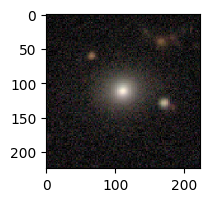

label: smooth_cigar


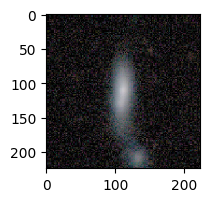

label: edge_on_disk


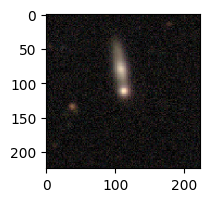

label: unbarred_spiral


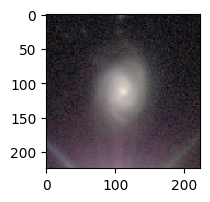

In [13]:
from PIL import Image

for classArr in [class0, class1, class2, class3]:
    plt.figure(figsize=(2, 2))
    train_image, train_label = dataset_train[classArr[0][0]]
    print("label: "+str(GalaxyMNISTHighrez.classes[train_label]))
    plt.imshow(train_image, interpolation='nearest')
    plt.show()    

---

### 3-Pre-processing

In this step, we will try to reduce the complexity of the data by:
   - Reduce the number of channels from RGB to greyscale.
   - Reduce the size of the image by a factor of 4.
   - Perform normalisation (divide by 255)


#### a- [Grayscale](https://www.tutorialspoint.com/pytorch-how-to-convert-an-image-to-grayscale)

In [14]:
import torchvision.transforms as transforms

In [15]:
images_train.shape

torch.Size([8000, 3, 224, 224])

we can see that the original image sizes has three channles which stands for the RGB colors

now let us perfom the greyscalling

In [16]:
transformGrey = transforms.Grayscale()
images_trainGrey = transformGrey(images_train)

Now let us check the size of the tensor

In [17]:
images_trainGrey.shape

torch.Size([8000, 1, 224, 224])

we can see the number of channels went down from 3 to 1

**Exersice2:**
Visualise the greyscaled images for all classes

label: unbarred_spiral
torch.Size([1, 224, 224])


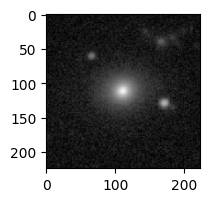

label: unbarred_spiral
torch.Size([1, 224, 224])


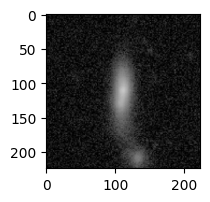

label: unbarred_spiral
torch.Size([1, 224, 224])


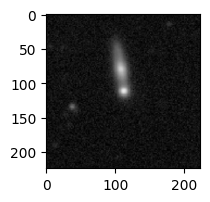

label: unbarred_spiral
torch.Size([1, 224, 224])


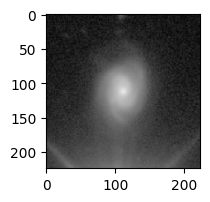

In [18]:
### -- Code here__
for classArr in [class0, class1, class2, class3]:
    plt.figure(figsize=(2, 2))
    train_image = images_trainGrey[classArr[0][0]]
    print("label: "+str(GalaxyMNISTHighrez.classes[train_label]))
    print(train_image.shape)
    plt.imshow(train_image[0],cmap='gray', vmin=0, vmax=255 )
    plt.show()  

#### b- [Size reduction](https://www.tutorialspoint.com/pytorch-how-to-resize-an-image-to-a-given-size)

In [19]:
transformResize = transforms.Resize(56)

Now let us reduce the image, we will reduce it on the greyscalled images

In [20]:
images_trainResized = transformResize(images_trainGrey)

now let us check the size

In [21]:
images_trainResized.shape

torch.Size([8000, 1, 56, 56])

**Exersice3:**
Visualise the resized images for all classes

In [1]:
#___ Code here___

for classArr in [class0, class1, class2, class3]:
    plt.figure(figsize=(2, 2))
    train_image = images_trainResized[classArr[0][0]]
    print("label: "+str(GalaxyMNISTHighrez.classes[train_label]))
    print(train_image.shape)
    plt.imshow(train_image[0],cmap='gray', vmin=0, vmax=255 )
    plt.show() 

NameError: name 'class0' is not defined

#### c- Normalization

Now we will simply try to devide the pixel values by 255

In [26]:
images_trainPre = images_trainResized

Now let us check the values before and after the nomalisatiom

In [27]:
print(images_trainResized[0][0][0])
print(images_trainPre[0][0][0])

tensor([24, 35, 16, 27, 11, 20,  7, 15, 15, 19, 14, 11,  5, 15, 37, 25, 17, 22,
        12, 22, 12,  6, 20,  5, 18, 15, 14, 31, 14, 12, 27, 18, 28, 22, 25, 17,
        25,  6,  5, 26, 22,  2, 14, 12, 14,  7, 16, 26, 12, 19, 13, 34, 36, 17,
        13, 20], dtype=torch.uint8)
tensor([24, 35, 16, 27, 11, 20,  7, 15, 15, 19, 14, 11,  5, 15, 37, 25, 17, 22,
        12, 22, 12,  6, 20,  5, 18, 15, 14, 31, 14, 12, 27, 18, 28, 22, 25, 17,
        25,  6,  5, 26, 22,  2, 14, 12, 14,  7, 16, 26, 12, 19, 13, 34, 36, 17,
        13, 20], dtype=torch.uint8)


---

save the data

In [28]:
%store images_trainPre


Stored 'images_trainPre' (Tensor)
